In [1]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

#Import data

df = pd.read_csv('sales_data.csv')
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


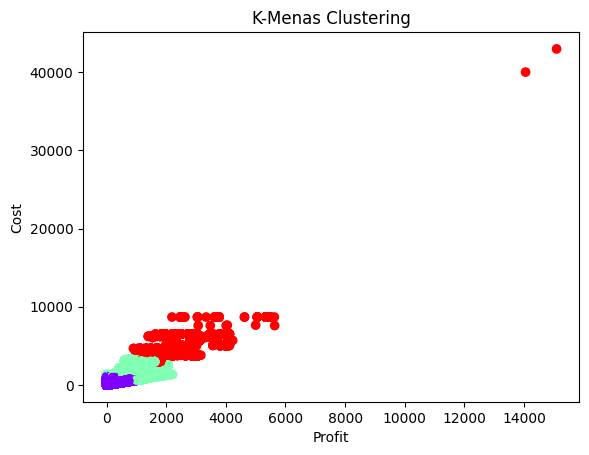

In [7]:
#Melakukan klasifikasi pada sales_data

import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt

#Import data/ Load Data
df = pd.read_csv('sales_data.csv')

# Disini saya menggunakan data Age-Group, State, profit dan cost
# Dikarenakan Age-group dan state adalah string maka diubah kedalam bentuk numerik menggunakan Encoding
# Melakukan Encoding untuk fitur ateforikal
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[['Age_Group', 'State']]).toarray()

# Menggabungkan data yang telah di encode dengan fitur numerik
data_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Age_Group', 'State']))
data_encoded['Profit'] = df['Profit']
data_encoded['Cost'] = df['Cost']

# Melakukan Clustering dengan KMeans
kmeans = KMeans(n_clusters=3) #menggunakan 3 cluster
kmeans.fit(data_encoded)
data_encoded['Cluster'] = kmeans.labels_

# Membuat visualisasi 2d 
plt.scatter(data_encoded['Profit'], data_encoded['Cost'], c=data_encoded['Cluster'], cmap='rainbow')
plt.xlabel('Profit')
plt.ylabel('Cost')
plt.title('K-Menas Clustering')
plt.show()